# ModelTraining

In [20]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),  # First hidden layer with 32 neurons
    tf.keras.layers.Dense(16, activation='relu'),  # Second hidden layer with 16 neurons
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron
])

C:\Users\Abhishek\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7469 - loss: 0.7192 - val_accuracy: 0.7980 - val_loss: 0.4750
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.4773 - val_accuracy: 0.7973 - val_loss: 0.4424
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8044 - loss: 0.4615 - val_accuracy: 0.8140 - val_loss: 0.4352
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.4567 - val_accuracy: 0.8180 - val_loss: 0.4325
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8058 - loss: 0.4359 - val_accuracy: 0.8240 - val_loss: 0.4342
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.4596 - val_accuracy: 0.8253 - val_loss: 0.4180
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.4346 - val_accuracy: 0.8300 - val_loss: 0.4022
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290 - loss: 0.4207 - val_accuracy: 0.

In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8653 - loss: 0.3625
Test Loss: 0.3732 - Test Accuracy: 0.8600


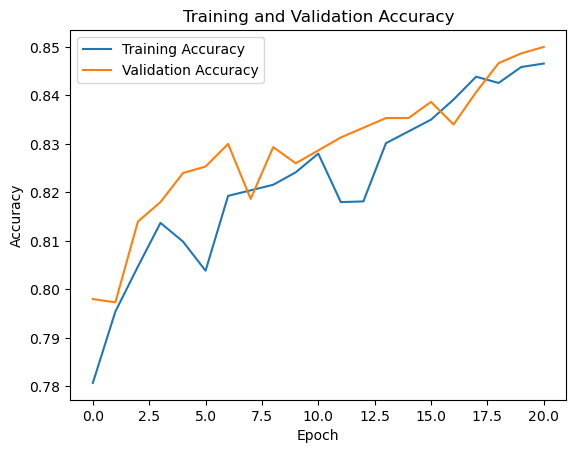

In [24]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [25]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output (0 or 1)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


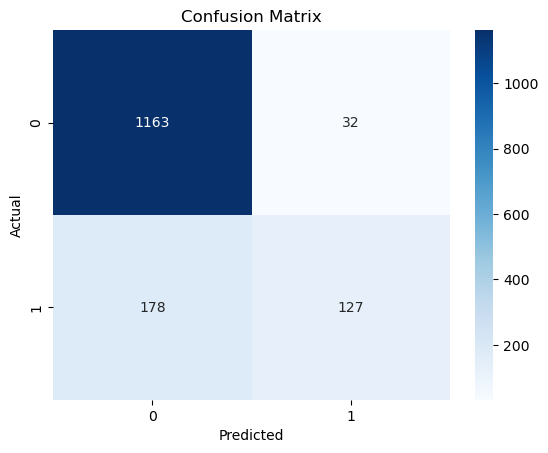

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1195
           1       0.80      0.42      0.55       305

    accuracy                           0.86      1500
   macro avg       0.83      0.69      0.73      1500
weighted avg       0.85      0.86      0.84      1500



In [28]:
# Save the model
model.save('customer_churn_model.h5')